In [515]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM

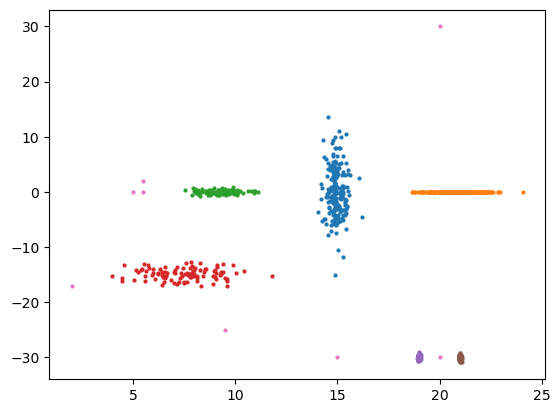

In [542]:
mus = [[15., 0.], [21., 0.], [9.3, 0.], [7.5, -15.], [19, -30.], [21, -30.]]
sigs = [[0.1, 20], [1, 0.001], [0.6, 0.1], [2, 1.], [0.001, 0.1], [0.001, 0.1]]
Ns = [200, 200, 100, 100, 100, 100]

exception_pts = [[20., 30.], [5.5, 0], [5.5, 2.], [5., 0], [2., -17.], [9.5, -25.], [15,-30.], [20, -30.]]
pts = []
pts_data = []
for i in range(len(Ns)):
    sampler = torch.distributions.multivariate_normal.MultivariateNormal(loc=torch.tensor(mus[i]), covariance_matrix=torch.diag(torch.tensor(sigs[i])))
    pts_generated = [sampler.sample().tolist() for _ in range(Ns[i])]
    # visualiser
    pts.append(np.asarray(pts_generated))
    # train
    pts_data = pts_data + pts_generated
pts.append(np.asarray(exception_pts))
pts_data += exception_pts
pts_data = np.asarray(pts_data)
for p in pts:
    plt.scatter(p[:, 0], p[:, 1], s=4)

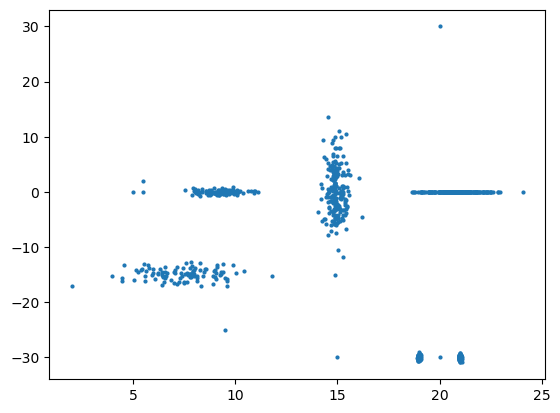

In [543]:
plt.scatter(pts_data[:,0], pts_data[:,1], s=4)

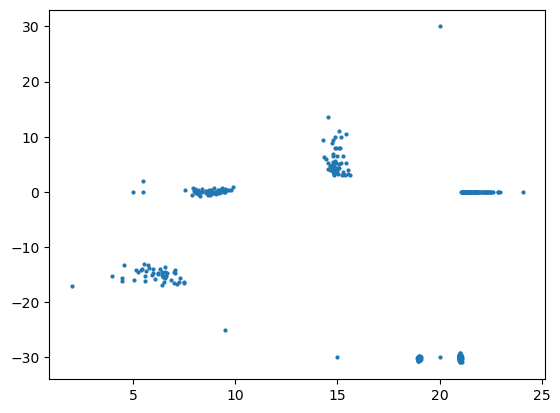

In [544]:
clf = OneClassSVM(kernel='rbf')
clf.fit(pts_data)
pred = clf.predict(pts_data)
idx = np.where(pred==-1)
pts_exception = pts_data[idx]
# visualisation
plt.scatter(pts_exception[:,0], pts_exception[:,1], s=4)

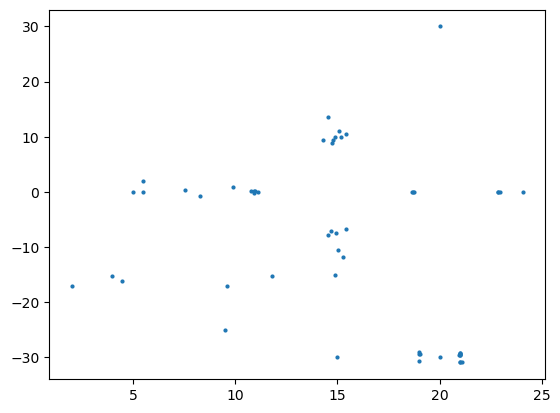

In [545]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
pred = clf.fit_predict(pts_data)
idx = np.where(pred==-1)
pts_exception = pts_data[idx]
# visualisation
plt.scatter(pts_exception[:,0], pts_exception[:,1], s=4)

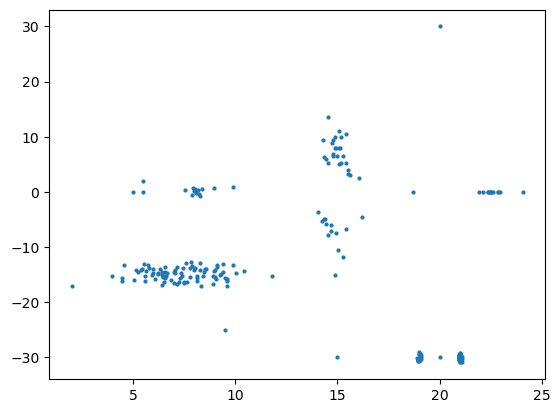

In [546]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0).fit(pts_data)
pred = clf.predict(pts_data)
idx = np.where(pred==-1)
pts_exception = pts_data[idx]
# visualisation
plt.scatter(pts_exception[:,0], pts_exception[:,1], s=4)